## Natural Computing Assignment 4 (Classifier Combining, Bagging & Boosting)
#### Simge Ekiz(s4706757), Luca Parola(s1009497), Katrin Bujari(s1005213)

## Question 1.1

**a)**  
 In the second case, what is the probability that all three doctors give the correct answer? What is the probability that at least 2 doctors make the right call? Combining these results, what is the probability that this group makes the right decision based on majority voting?    
   
$P(a,b,c) = 0.8 * 0.8 * 0.8 = 0.512 $  
$P(a,b) = 0.8 * 0.8 = 0.64  $  
The probability that this group makes the right decision based on majority voting is
0.64.  

**b)**   
Can you come up with a general formula to calculate the probability that c doctors with competence p make the correct decision by ma- jority voting? Use it to calculate the probability of a correct decision for the group of medical students.    
  
$ F = \prod_{i=1}^n p_i$  where  $  n = (\frac{totalnumber}{2}) + 1 $    
$ n = (\frac{21}{2}) + 1 = 10.5 + 1 =11.5 ≃ 12$  
$F = 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 = 0.0036$  

**c)**  
Code a simulation to check your answer to the previous question, or, if you did not find a formula, use this simulation to answer the previous question.

In [27]:
m=21
n=int(m/2)+1

In [28]:
p=0.6
F=1

In [29]:
for i in range(0, n):
    F = F * p
print(F)

0.0036279705599999994


**d)**   
Make a graph of the probability of a correct decision for various sizes of the jury and different competence levels (p) of the individual doctors.  
The graph below has the jury size n = [4, 8, 12, 16, 19, 21 ] and the probability p = [0.9, 0.7, 0.5, 0.3].  
<img src="images/1-1-d.png" alt="graph for question 1.1.d">

**e)**  
Who has the highest chance to make the correct decision: the radiol- ogist, the group of doctors or the group of students? How big does the group of medical students need to be to make the probability of a correct decision (almost) equal to the prediction of the group of doctors?  
  
  
The highest chance to make the correct decision has the radiologist as the probability is 0.85 while for the doctors with majority voting is 0.64 and the lowest chance comes from students with 0.0036.
To make the probability of the doctors equal with the students we should have just one student as the result of doctors is 0.64 or 0.512 and one student has the probability of 0.6.

## Question 1.2  
**a)** Complete the table by filling in the values for the calculating the values produced by the different combiners and indicate which de- cision each combiner would make based on these values.  

<img src="images/1-2.png" alt="graph for question 1.2">  
Mean A = (0.9 + 0.9 + 0.0) / 3 = 0.6  
Product A = 0.9 * 0.9 *0.0 = 0.0  


## Question 1.3  
  
  When taking a bootstrap sample, typically, some observations from the dataset will be present twice, while others will not be present. In bagging, these left-out samples (called out-of-bag examples) are useful, because they will not be used in the construction of the classifier/decision tree, so they can be used to evaluate its performance. What percentage of the observations from the original sample of size N will not be present in the bootstrap sample? Derive a formula, or, alternately, code a simulation and plot its result for various sample sizes N. How does this percentage change for different sample sizes N? What percentage does it converge to?  

There is no defined percentage in that won’t be presented in bootstrap sample, but it is mostly around 37%.  
Theformulatocalculateitis: $1−(1 − 1/N)^N$  
For the graph below we used N = [100, 200, 400, 500, 760, 1200, ] sample size.  
<img src="images/1-3.png" alt="graph for question 1.3">  

## Question 1.4  
  
In your own words, explain the difference between bootstrapping and random subspaces.

The bootstrapping and random subspace models are pretty same. However, there is a difference between this two, features. While in bootstrapping we create randomly sub-samples of the data set, in RSM we randomly sample the features. So, in bootstrapping we try to avoid the error caused from the small data set and in RSM we try to avoid the focus from the highly predictive features. Beside features, the other difference between bootstrapping and RSM is that bootstrapping is used more when we have small sample as, they are more convenient to mislead the result. On the other hand, RSM is used when we have high number of features but we ignore less predictive features.

## Question 1.5  
  
To explain the performance of a random forest model, people often turn to measures of variable importance to determine which variables are most important in obtaining the given result. Find out, in the literature, or, for instance, in the documentation of a random forest implementation, how this importance are typically calculated for random forests. In a few sentences, explain and critique this approach.

The number of features in the subset that are randomly considered at each stage is controlled by the max_features parameter. 
This randomness in selecting the bootstrap sample to train an individual tree in a forest ensemble, combined with the fact that splitting a node in the tree is restricted to random subsets of the features of the split, virtually guarantees that all of the decision trees and the random forest will be different. 


The random forest model is quite sensitive to the max_features parameter. Max_Features is set to one, the random forest is limited to performing a split on the single feature that was selected randomly instead of being able to take the best split over several variables. This means the trees in the forest will likely be very different from each other and possibly with many levels in order to produce a good fit to the data. On the other hand if Max_features is high, close to the total number of features that each instance has, the trees in the forest will tend to be similar and probably will require fewer levels to fit the data using the most informative features. 

Once a random forest model is trained, it predicts the target value for new instances by first making a prediction for every tree in the random forest. 
For classification the overall prediction is based on a weighted vote. Each tree gives a probability for each possible target class label then the probabilities for each class are averaged across all the trees and the class with the highest probability is the final predicted class. 


As usual, there are four categories of fruit to be predicted. Because the number of features is restricted to just two in this very simple example, the randomness in creating the tree ensemble is coming mostly from the bootstrap sampling of the training data. 


we iterate through pairs of feature columns in the dataset. For each pair of features we call the fit method on that subset of the training data X using the labels y.
We then use the utility function plot class regions for classifier that's available in the shared module for this course to visualize the training data and the random forest decision boundaries. Let's apply random forest to a larger dataset with more features. 

For comparison with other supervised learning methods, we use the breast cancer dataset again. We create a new random forest classifier and since there are about 30 features,  If we didn't set the random state parameter, the model would likely be different each time due to the randomized nature of the random forest algorithm. So, on the positive side, random forest are widely used because they're very powerful. They give excellent prediction performance on a wide variety of problems and they don't require careful scaling of the feature data or extensive parameter tuning. 

And even though building many different trees requires a corresponding increase in computation, building random forests is easily paralyzed across multiple CPU's. On the negative side while random forests do inherit many of the benefits of decision trees, one big difference is that random forest models can be very difficult for people to interpret making it difficult to see the predictive structure of the features or to know why a particular prediction was made. 

In addition, random forests are not a good choice for tasks that have very high dimensional sparse features like text classification, where linear models can provide efficient training and fast accurate prediction. 
So to recap, here are some of the key parameters that you'll need for using random forests. N_estimators sets the number of trees to use. 
The default value for n_estimators is 10 and increasing this number for larger data sets is almost certainly a good idea since ensembles that can average over more trees will reduce overfitting. Just bear in mind that increasing the number of trees in the model will also increase the computational cost of training. You'll use more time and more memory. So in practice you'll want to choose the parameters that make best use of the resources available on your system. As we saw earlier, the max_features parameter has a strong effect on performance. It has a large influence on how diverse the random trees in the forest are. 

Typically, the default setting of max features, which for classification is the square root of the total number of features and for regression is the log base two of the total number of features, works quite well in practice although explicitly adjusting max_features may give you some additional performance gain with smaller values of max features tending to reduce overfitting. 

The max depth parameter controls the depth of each tree in the ensemble. The default setting for this is none, in other words, the nodes in a tree will continue to be split until all leaves contain the same class or have fewer samples than the minimum sample split parameter value, which is two by default. 



Finally, given the random nature of random forests, if you want reproducible results it's especially important to choose a fixed setting for the random state parameter. In the examples we've shown here we typically set random state to zero but any fixed number will work just as well. 

## Question 1.6  
  
Find out what widely used random forest implementations are available in your favourite programming language and apply the method to a prediction problem you find interesting (see, for instance the UCI Machine Learning repository for interesting datasets). Write a short description (min. 100 words) of your findings, including what dataset and imple- mentation you used, how you set up your experiment, what the effect of different parameter settings was, what the performance was, which variables were important, etc.).

We use two different dataset spam dataset from UCI Machine Learning Reprository and Titanic Dataset fromm Kaggle 
WE DID BLA BLA
As an example for tuning the parameters. First we set we set max_features to auto(which is square root of the total number of features) and 1 for the Spambase dataset. When max_features=1 the trees in the forest are diverse and complicated. When max features is getting higher the trees in the forest will tend to be similar and simpler.
- this will require fewer levels to fit the data using the most informative features. 
- It has a large influence on how diverse the random trees in the forest are.

- Finally, given the random nature of random forests, if you want reproducible results it's especially important to choose a fixed setting for the random state parameter. In the examples we've shown here we typically set random state to zero but any fixed number will work just as well.

 - - Max_Features is set to one, the random forest is limited to performing a split on the single feature that was selected randomly instead of being able to take the best split over several variables. This means c. On the other hand if Max_features is high, close to the total number of features that each instance has, the trees in the forest will tend to be similar and probably will require fewer levels to fit the data using the most informative features.

eight to give a diverse set of trees that also fit the data reasonably well. We can see that random forest with no feature scaling or extensive parameter tuning achieve very good test set performance on this dataset, in fact, it's as good or better than all the other supervised methods we've seen so far including current life support vector machines and neural networks that require more careful tuning. 
max_features

## Question 2.1

In the AdaBoost.M1 algorithm, in each step a base-learner is added to the
ensemble with a weight that depends on its (weighted) error. Derive this
weight of the added tree, Equation 10.12 on page 344 of The Elements of
Statistical Learning (Exercise 1, Chapter 10).

We start from the expression 10.11


$$(e^β − e^{−β})\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) + e^{-β}\:\Sigma{^n}_{i=1}w^{(m)}_i$$


To minimize this expression we will have to take the derivative and set it to 0 and then solve for $\beta$



$$(e^β + e^{-β})\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) - e^{-β}\:\Sigma{^n}_{i=1}w^{(m)}_i\:=\:0$$


Then to make it simpler we mulitply by $e^β$ . The expression then becomes:


$$(e^{2β} + 1)\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) - \:\Sigma{^n}_{i=1}w^{(m)}_i\:=\:0$$


Therefore we will have that $e^{2β} $ is:


$$e^{2β}=\frac{\Sigma{^n}_{i=1}w^{(m)}_i \:-\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) }{\Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i))}$$


Now we know that the $err_m$ is defined as:


$$err_m= \frac{\Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i))}{\Sigma{^n}_{i=1}w^{(m)}_i}$$


So we can just substitute this expression. Therefore the $e^{2\beta}$ becomes:

$$e^{2β}=\frac{1}{err_m}-1=\frac{1-err_m}{err_m}$$

Now we can just solve for $\beta$: 


$$\beta=\frac{1}{2}log\left(\frac{1-err_m}{err_m}\right)$$

## Question 2.2

Plot the weight given to a base-learner in the AdaBoost algorithm for
different values of the error the base-learner makes. Explain what you
see. What does it mean for these weights if we assume the base-learners
are weak-learners? What happens to the weights if the probability of
error of the base-learner is > 0.5 and why?

In [4]:
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
#We initialize the errors from 0.01 to 1 every 0.01
errors=np.arange(0.01, 1, 0.01)

In [6]:
#We compute the alpha(the weight) for each error rate
weigths=[]
for i in range(len(errors)):
    alpha_m=np.log(((1-errors[i])/errors[i]))
    weigths.append(alpha_m)

No handles with labels found to put in legend.


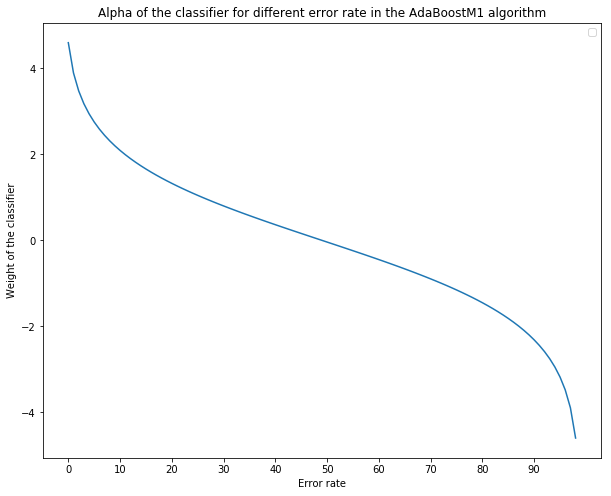

In [7]:
#Now we can plot the results
plt.figure(1,figsize=(10,8))
plt.title("Alpha of the classifier for different error rate in the AdaBoostM1 algorithm")
plt.xlabel("Error rate")
plt.ylabel("Weight of the classifier")
plt.plot(weigths)
plt.xticks(np.arange(0,100,10))
plt.legend()
plt.show()

As we see from the above plot, when the error rate cross the 50% , the weight become negative as we may have expected. This means that the worse a classifier performs, the less it counts in the strong learner. 

## Question 2.3

In your own words, explain some of the main differences between bagging and boosting.

Boosting is a technique used to build a strong learner from multiples weak learners, where a weak learner is defined as a model whose probability of outputting the right prediction is just above chance with an edge of   $\gamma$ . The weak learners are integrated weighing their performance. Therefore the weak learner that performs worse than the others, will count less when integrated in the strong learner. In addition to this, after that a weak learner is added to the strong learner, the data that were correclty classified by this weak learner, will count less in the training of the next weak learner,while the misclassified datapoint will weigh more. Doing so means that each next weak learner will be more inclined to classify the samples miscalissified by the previous learners.
Bagging , which is a crasis of B(oostrap) AGG(regat)ING , is another ensemble algorithm which aims to improve the accuracy of a machine learning algorithm (usually decision three). It works as follows: from a dataset X , other n  X1...Xn different training dataset are built ( can have less or the same number of data point of the original dataset) with samples that are drawn uniformly and with replacment from the original dataset . This means that a sample can be present in many new datasets. Then it fits n models with the different training sets and it avarages the output, which can be the mean in the case of a regression problem, or just picking the output which has the most "votes"  from the models, in the case of a classification problem. 

## Question 2.4

How does AdaBoost relate to gradient boosting?

Both AdaBoost and gradient boosting try to do the same thing, which is to combine many weak learners in a strong one to minimize the error of the classifier. Both can be thought as Arcing algorithm , which " is an acronym for Adaptive Reweighting and Combining. Each step in an arcing algorithm consists of a weighted minimization followed by a recomputation of the classifiers and weighted input.", as stated by Leo Breiman. The two algorithms differ on the way they train the weak learners. 
On one hand Adaboost trains the new weak learner changing the sample distribution adjusting the weights from the previous iteration. Doing this means that each next weak lernear will be more inclined to focus on the samples that were wrongly classified by the previous weak learner, as these will weigh more.AdaBoost also adjust the weights of the weak learner in the strong learner according to the error rate, so the better a weak learner performs, the more it will be counted its "vote" win the final classifier.
On the other hand, gradient boosting does not changes the sample distribution. In this case the weak learners are added in order to optimize a loss function, in a gradient descent fashion. Therefore the starting point is to have a model with a certain loss on a train set, and from there add at each iteration a weak learner that points the loss function towards a minimum. So the goal is to find an $F1(x)$ such that $F1(x)=F0+f(x)=y$ where y is the true value of the sample. This means that gradient boosting can be used with different kind of error functions , given that are differentiable, and also can be used on regression problems.

## Question 2.5

Similar to what you did for the random forest, find out what widely used
gradient boosting or AdaBoost implementations are available in your
favourite programming language and apply the method to a prediction
problem you find interesting (see, for instance the UCI Machine Learning
repository for interesting datasets). Write a short description (min. 100
words) of your findings, including what dataset and implementation you
used, how you set up your experiment, what the effect of different parameter
settings was, what the performance was, which variables where
important, etc.).

For the exercise we will try to predict wheter a person has diabates or not. The database can be found here: https://www.kaggle.com/uciml/pima-indians-diabetes-database. We have the following dimensions :

Pregnancies (Number of times pregnant),Glucose (Plasma glucose concentration a 2 hours in an oral glucose tolerance test), BloodPressure (Diastolic blood pressure (mm Hg)), SkinThickness (Triceps skin fold thickness (mm)), Insulin (2-Hour serum insulin (mu U/ml)), BMI (Body mass index (weight in kg/(height in m)^2)), DiabetesPedigreeFunction (Diabetes pedigree function), Age (Age (years)), Outcome (Class variable (0 or 1))

For the exercise we use the AdaBoost Classifier which is parte of the sklearn package. 

In [8]:
import pandas as pd

In [11]:
##we import the dataset
diab_pd = pd.read_csv("data/diabetes.csv")

In [12]:
diab_pd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
from sklearn.ensemble import AdaBoostClassifier

In [14]:
model=AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

We take the values(X) from the dataset to fit the model as well as the classes(Y)

In [15]:
array = diab_pd.values

X=array[:,0:8]
Y=array[:,8:9]

Then we can train the model. We will start from a baseline and then try to change the relevant parameters of the algorithm to see how the resuls may change

We start with 30 trees

In [16]:
seed=5
model = AdaBoostClassifier(n_estimators=30, random_state=seed)

In [17]:
model.fit(X,Y.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=30, random_state=5)

In [18]:
model.score(X,Y)

0.8033854166666666

Then we can try to change the number of trees and see if and how the score changes accordingly



In [19]:
model1 = AdaBoostClassifier(n_estimators=50, random_state=seed)

In [20]:
model1.fit(X,Y.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=5)

In [21]:
model1.score(X,Y)

0.82421875

It looks that incresing the number of tree increases the accuracy as we could have expected.
We can try to build different model adding each time 10 trees and then plot the score according to the number of trees.
We also save the importance given to each attributes of the dataset for each iteration.

In [22]:
##We take the columns names from the dataset
attributes=diab_pd.columns.values

Now we can build the different modesl and see how each performs. We also store the relative importance given to each attribute to plot later.

In [23]:
scores=[]
importances=[]
for i in range(10,500,10):
    model=AdaBoostClassifier(n_estimators=i, random_state=seed)
    model.fit(X,Y.ravel())
    scores.append(model.score(X,Y))
    importance=model.feature_importances_
    index=0
    importances.append(importance)

In [24]:
importances=np.asarray(importances)

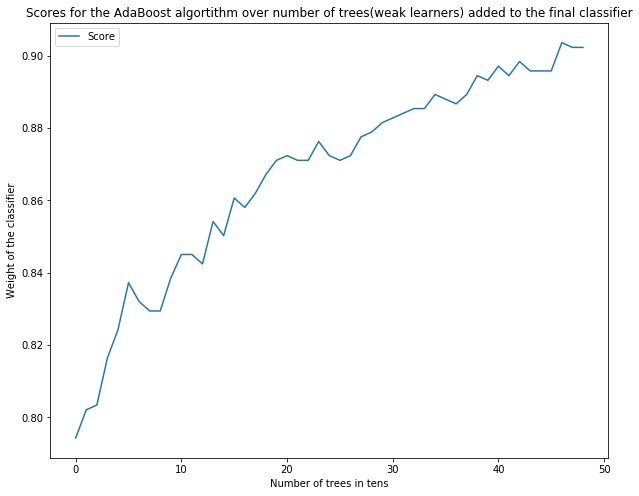

In [25]:
plt.figure(1,figsize=(10,8))
plt.title("Scores for the AdaBoost algortithm over number of trees(weak learners) added to the final classifier")
plt.xlabel("Number of trees in tens")
plt.ylabel("Weight of the classifier")
plt.plot(scores,label=("Score"))
plt.legend()
plt.show()

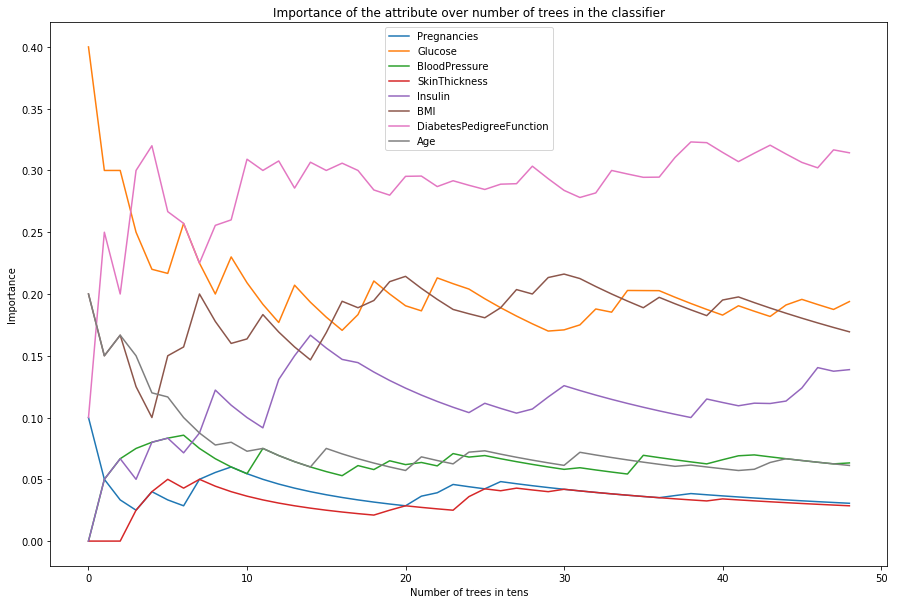

In [26]:
plt.figure(1,figsize=(15,10))
plt.title("Importance of the attribute over number of trees in the classifier")
plt.xlabel("Number of trees in tens")
plt.ylabel("Importance")
for i in range(0,np.shape(importances)[1]):
    name=attributes[i]
    plt.plot(importances[:,i:i+1],label=name)
plt.legend()
plt.show()

As we see from the above plots we can say that the ensemble method in this case works decently. We reach a maximum of just above 90% of correct classification with 500 weak learner, and we would expect the score to improve a little bit more adding each time more tree and then level off. On the second plot we can see how en each strong learner, the importance given to each attribute of the dataset changes. Although we can see a certain degree until we start building models with 100 trees, then the importances become relatively more stable. 